In [0]:
import pandas as pd
#그래프 표현
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns

In [0]:
#Colaboratory Matplotlib 에서 한글폰트 사용하기
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

sys_font number: 47
['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/201905.csv',header = None)
df.columns=['자전거번호','대여일시','대여소번호','대여소명','거치대번호','반납일시','반납대여소번호','반납대여소명','반납거치대번호','이용시간(분)','이용거리(M)']
df.head()

,자전거번호,대여일시,대여소번호,대여소명,거치대번호,반납일시,반납대여소번호,반납대여소명,반납거치대번호,이용시간(분),이용거리(M)
0,SPB-01857,2019-05-01 0:01,1908,해원리바파크 육교 밑,3,2019-05-01 0:03,1957,구일고등학교 정문,6,2,480
1,SPB-18298,2019-05-01 0:03,241,신길우성1차아파트 앞 공원,5,2019-05-01 0:04,255,도림4거리,10,0,290
2,SPB-12844,2019-05-01 0:00,1224,아시아지하보도 2번 출구,13,2019-05-01 0:04,1249,아주중학교건너편,10,4,960
3,SPB-15490,2019-05-01 0:01,521,왕십리역 11번 출구 앞,2,2019-05-01 0:04,520,상왕십리역 4번 출구 앞,7,2,0
4,SPB-18475,2019-05-01 0:01,364,창신역 1번출구 앞,4,2019-05-01 0:04,361,동묘앞역 1번출구 뒤,1,3,730


In [0]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

df["대여연도"] = df["대여일시"].dt.year
df["대여월"] = df["대여일시"].dt.month
df["대여일"] = df["대여일시"].dt.day
df["대여시간"] = df["대여일시"].dt.hour
df["대여요일"] = df["대여일시"].dt.dayofweek

df["반납연도"] = df["반납일시"].dt.year
df["반납월"] = df["반납일시"].dt.month
df["반납일"] = df["반납일시"].dt.day
df["반납시간"] = df["반납일시"].dt.hour
df["반납요일"] = df["반납일시"].dt.dayofweek

In [0]:
#같은 대여/반납이 가장 많은 지역
#뚝섬유원지역 1번출구 앞
t = df.loc[df["대여소명"]==df["반납대여소명"]]
t['대여소명'].describe()

count            108403
unique             1527
top       뚝섬유원지역 1번출구 앞
freq               2962
Name: 대여소명, dtype: object

In [0]:
#뚝섬 데이터만 따로 저장
df2 = df[(df["대여소명"] == '뚝섬유원지역 1번출구 앞') & (df["반납대여소명"] == '뚝섬유원지역 1번출구 앞')].copy()
df2['자전거번호(SPB)'] = df2['자전거번호'].apply(lambda x: x.split('-')[1])
#object -> int 형변환
df2 = df2.astype({'자전거번호(SPB)': 'int64'})

#데이터 학습하기(이용 거리 예측)

In [0]:
feature = ['대여소번호', '반납대여소번호','이용시간(분)','자전거번호(SPB)',
       '대여연도', '대여월', '대여일', '대여시간', '대여요일', '반납연도', '반납월', '반납일',
       '반납시간', '반납요일']

feature

['대여소번호',
 '반납대여소번호',
 '이용시간(분)',
 '자전거번호(SPB)',
 '대여연도',
 '대여월',
 '대여일',
 '대여시간',
 '대여요일',
 '반납연도',
 '반납월',
 '반납일',
 '반납시간',
 '반납요일']

In [0]:
label = "이용거리(M)"
label

'이용거리(M)'

In [0]:
X_train_df= df2[feature].copy()
y_train_df = df2[label].copy()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train_df, y_train_df, test_size=0.2, train_size=0.8, random_state=11)

In [0]:
X_train.shape

(2369, 14)

In [0]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
#학습
rfr.fit(X_train, y_train)
#예측
y_predict = rfr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
test = pd.DataFrame(y_test)
test['예측거리(M)'] = y_predict

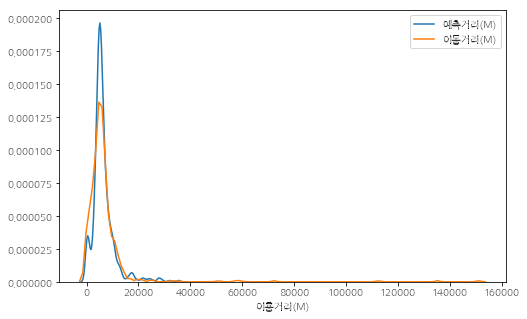

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(y_predict, hist=False, label='예측거리(M)')
sns.distplot(test[label], hist=False, label='이동거리(M)')